In [2]:
import os
import re
import cv2 # opencv library
import numpy as np
from os.path import isfile, join
import matplotlib.pyplot as plt

In [3]:
# define the video path
file = 'Downloads\symester4\programming\project\Vehicle detection project done\frames\test_video.mp4'

# capture the video
cap = cv2.VideoCapture(file)
i = 0  # frame index to save frames

# extract and save the video frames
while (cap.isOpened()):
    ret, frame = cap.read()
    saved=cv2.imwrite(r'C:\Users\Abdallah\Downloads\symester4\programming\project\Vehicle detection project done\frames/'+str(i)+'.jpg', frame)
    i+=1

cap.release()
cv2.destroyAllWindows()

In [4]:
	# get file names of the frames from the frames directory
col_frames = os.listdir('frames/')

In [7]:
# sort file names
col_frames.sort(key=lambda f: int(re.sub('\D', '', f)))

# empty list to store the frames
col_images=[]

for i in col_frames:
    # read the frames
    img = cv2.imread('frames/'+i)
    # append the frames to the list
    col_images.append(img)

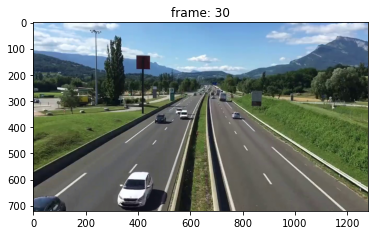

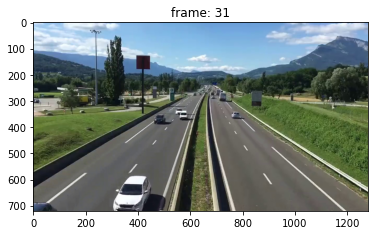

In [19]:
# plot 76th frame
i = 30

for frame in [i, i+1]:
    plt.imshow(cv2.cvtColor(col_images[frame], cv2.COLOR_BGR2RGB))
    plt.title("frame: "+str(frame))
    plt.show()

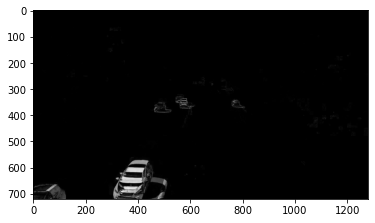

In [20]:
# convert the frames to grayscale
grayA = cv2.cvtColor(col_images[i], cv2.COLOR_BGR2GRAY)
grayB = cv2.cvtColor(col_images[i+1], cv2.COLOR_BGR2GRAY)

# plot the image after frame differencing
plt.imshow(cv2.absdiff(grayB, grayA), cmap = 'gray')
plt.show()

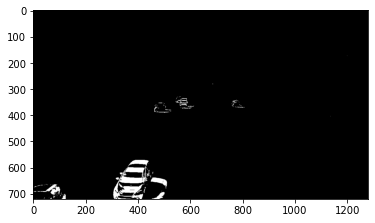

In [21]:

diff_image = cv2.absdiff(grayB, grayA)

# perform image thresholding
ret, thresh = cv2.threshold(diff_image, 60, 255, cv2.THRESH_BINARY)

# plot image after thresholding
plt.imshow(thresh, cmap = 'gray')
plt.show()

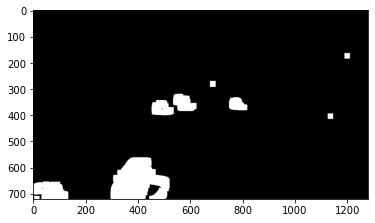

In [27]:
# apply image dilation
kernel = np.ones((5,5),np.uint8)
dilated = cv2.dilate(thresh,kernel,iterations = 5)

# plot dilated image
plt.imshow(dilated, cmap = 'gray')
plt.show()

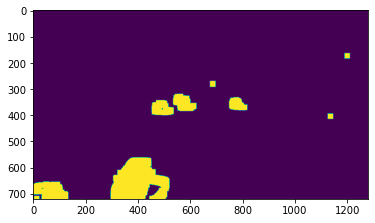

In [28]:
# plot vehicle detection zone
plt.imshow(dilated)
cv2.line(dilated, (0, 400),(1300,400),(0, 255, 0))
plt.show()

In [29]:
# find contours
contours, hierarchy = cv2.findContours(thresh.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)

In [30]:
valid_cntrs = []

for i,cntr in enumerate(contours):
    x,y,w,h = cv2.boundingRect(cntr)
    if (x <= 1200) & (y >= 400) & (cv2.contourArea(cntr) >= 6000):
        valid_cntrs.append(cntr)

# count of discovered contours        
len(valid_cntrs)

1

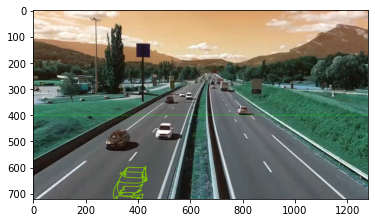

In [31]:
dmy = col_images[13].copy()

cv2.drawContours(dmy, valid_cntrs, -1, (127,200,0), 2)
cv2.line(dmy, (0, 400),(1300,400),(0, 255, 0))
plt.imshow(dmy)
plt.show()

In [52]:
# kernel for image dilation
kernel = np.ones((5,5),np.uint8)

# font style
font = cv2.FONT_HERSHEY_SIMPLEX

# directory to save the ouput frames
pathIn = "contour_frames_3/"

for i in range(len(col_images)-1):
    
    # frame differencing
    grayA = cv2.cvtColor(col_images[i], cv2.COLOR_BGR2GRAY)
    grayB = cv2.cvtColor(col_images[i+1], cv2.COLOR_BGR2GRAY)
    diff_image = cv2.absdiff(grayB, grayA)
    
    # image thresholding
    ret, thresh = cv2.threshold(diff_image, 60, 255, cv2.THRESH_BINARY)
    
    # image dilation
    dilated = cv2.dilate(thresh,kernel,iterations = 5)
    
    # find contours
    contours, hierarchy = cv2.findContours(dilated.copy(), cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
    
    # shortlist contours appearing in the detection zone
    valid_cntrs = []
    for cntr in contours:
        x,y,w,h = cv2.boundingRect(cntr)
        if (x <= 1200) & (y >= 400) & (cv2.contourArea(cntr) >= 8000):
            if (y >= 600) & (cv2.contourArea(cntr) < 10000):
                break
            valid_cntrs.append(cntr)
            
    # add contours to original frames
    dmy = col_images[i].copy()
    cv2.drawContours(dmy, valid_cntrs, -1, (0,255,0), 2)
    
    cv2.putText(dmy, "vehicles detected: " + str(len(valid_cntrs)), (55, 15), font, 0.6, (0, 180, 0), 2)
    cv2.line(dmy, (0, 400),(1300,400),(255, 0, 0), 3)
    cv2.imwrite(pathIn+str(i)+'.jpg',dmy)

In [53]:
# specify video name
pathOut = 'vehicle_detection_v3.mp4'

# specify frames per second
fps = 24.0

In [54]:
frame_array = []
files = [f for f in os.listdir(pathIn) if isfile(join(pathIn, f))]

In [55]:
files.sort(key=lambda f: int(re.sub('\D', '', f)))

for i in range(len(files)):
    filename=pathIn + files[i]
    
    #read frames
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    
    #inserting the frames into an image array
    frame_array.append(img)

In [56]:
out = cv2.VideoWriter(pathOut,cv2.VideoWriter_fourcc(*'DIVX'), fps, size)

for i in range(len(frame_array)):
    # writing to a image array
    out.write(frame_array[i])

out.release()